In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from colors import colors

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams.update({'font.size': 12})

In [2]:
# Fig 6-->  (overlay of "time since cooldown" for different experiments)

# get data

In [11]:
data = {}

# cresst CaWO4

expr = 'cresst_CaWO4'
file='./data/rate_vs_time/TUM93A.csv'
filedata = np.loadtxt(file,skiprows=1,delimiter=',')
data[expr] = {}

data[expr]['time'] = filedata[:, 0]  # days since cooldown 
data[expr]['rate'] = filedata[:, 1] # 1 / days  # TODO replace
data[expr]['exposure'] = 1  # exposure for each bin, days # TODO replace 
data[expr]['uncertainty'] = filedata[:, 2]  # 1 / days # TODO replace

# cresst Si

expr = 'cresst_Si'
file='./data/rate_vs_time/Si2LD.csv'
filedata = np.loadtxt(file,skiprows=1,delimiter=',')
data[expr] = {}

data[expr]['time'] = filedata[:, 0]  # days since cooldown 
data[expr]['rate'] = filedata[:, 1] # 1 / days  # TODO replace
data[expr]['exposure'] = 1  # exposure for each bin, days # TODO replace 
data[expr]['uncertainty'] = filedata[:, 2]  # 1 / days # TODO replace


# cresst Sapp2

expr = 'cresst_Sapp2'
file='./data/rate_vs_time/Sapp2.csv'
filedata = np.loadtxt(file,skiprows=1,delimiter=',')
data[expr] = {}

data[expr]['time'] = filedata[:, 0]  # days since cooldown 
data[expr]['rate'] = filedata[:, 1] # 1 / days  # TODO replace
data[expr]['exposure'] = 1  # exposure for each bin, days # TODO replace 
data[expr]['uncertainty'] = filedata[:, 2]  # 1 / days  # TODO replace

# cpd (to be replaced) 

expr = 'tesseract38'
data[expr] = {}
file='./data/rate_vs_time/TESSERACT_StressInducedSource_LowStress_TimesHours.csv'
filedata = np.loadtxt(file,delimiter=',')

data[expr]['time'] = filedata[:]/24.  # days since cooldown # 

file='./data/rate_vs_time/TESSERACT_StressInducedSource_LowStress_Rate_03_38.csv'
filedata = np.loadtxt(file,delimiter=',')

data[expr]['rate'] = filedata[:,0]*60*60*24   # 1 / days 
data[expr]['exposure'] = 1.2/24  # exposure for each bin, days # TODO replace 
data[expr]['uncertainty'] = filedata[:,1]*60*60*24  # 1 / days  # TODO replace


expr = 'tesseract85'
data[expr] = {}
file='./data/rate_vs_time/TESSERACT_StressInducedSource_LowStress_TimesHours.csv'
filedata = np.loadtxt(file,delimiter=',')

data[expr]['time'] = filedata[:]/24.  # days since cooldown # 

file='./data/rate_vs_time/TESSERACT_StressInducedSource_LowStress_Rate_38_85.csv'
filedata = np.loadtxt(file,delimiter=',')

data[expr]['rate'] = filedata[:,0]*60*60*24   # 1 / days 
data[expr]['exposure'] = 1.2/24  # exposure for each bin, days # TODO replace 
data[expr]['uncertainty'] = filedata[:,1]*60*60*24  # 1 / days # TODO replace

# EDELWEISS

expr = 'Edelweiss'
file='./data/rate_vs_time/edelweiss_w_errors.txt'
filedata = np.loadtxt(file,skiprows=0)
data[expr] = {}

data[expr]['time'] = filedata[:, 0]  # days since cooldown 
data[expr]['rate'] = filedata[:, 1]*24 # 1 / days  # TODO replace
data[expr]['exposure'] = 1  # exposure for each bin, days # TODO replace 
data[expr]['uncertainty'] = filedata[:, 2]*24
data[expr]['uncertainty2'] = filedata[:, 3]*24# 1 / days assuming that each data point corresponds to one day measurement

# Mannila

expr = 'mannila'
file='./data/rate_vs_time/Mannila_fig4.csv'
filedata = np.loadtxt(file,skiprows=2,delimiter=',')
data[expr] = {}

data[expr]['time'] = filedata[:, 0]
data[expr]['time'] = data[expr]['time'][~np.isnan(data[expr]['time'])]# days since cooldown 
data[expr]['rate'] = filedata[:, 1]*60*60*24 # 1 / days  # TODO replace
data[expr]['rate'] = data[expr]['rate'][~np.isnan(data[expr]['rate'])]
data[expr]['uncertainty'] = filedata[:, 2]*60*60*24 # 1 / days  # TODO replace
data[expr]['uncertainty'] = data[expr]['uncertainty'][~np.isnan(data[expr]['uncertainty'])]


expr = 'mannila2'
data[expr] = {}
data[expr]['time'] = filedata[:, 5]  # days since cooldown 
data[expr]['time'] = data[expr]['time'][~np.isnan(data[expr]['time'])]
data[expr]['rate'] = filedata[:, 6]*60*60*24 # 1 / days  # TODO replace
data[expr]['rate'] = data[expr]['rate'][~np.isnan(data[expr]['rate'])]
data[expr]['uncertainty'] = filedata[:, 7]*60*60*24 # 1 / days  # TODO replace
data[expr]['uncertainty'] = data[expr]['uncertainty'][~np.isnan(data[expr]['uncertainty'])]





# plot

Label                          A                         p               χ²/ndf    
-------------------------------------------------------------------------------------
SPICE LS 3-38 eV               1.89e+00 ± 6.20e-02       -0.60 ± 0.02    1.40      
SPICE LS 38-85 eV              1.03e-01 ± 1.43e-02       -0.43 ± 0.10    0.87      
Mannila '22 Run 1              8.72e+00 ± 3.51e-01       -0.95 ± 0.01    4.82      
Mannila '22 Run 2              7.46e+00 ± 1.96e-01       -0.91 ± 0.01    1.06      
CRESST-III CaWO$_4$ 60-120 eV  2.14e+01 ± 1.14e+01       -0.93 ± 0.10    1.09      
CRESST-III Al$_2$O$_3$ 60-120 eV 2.56e+01 ± 5.60e+00       -0.72 ± 0.04    0.99      
CRESST-III Si 60-120 eV        1.96e+01 ± 9.00e+00       -0.96 ± 0.09    0.73      


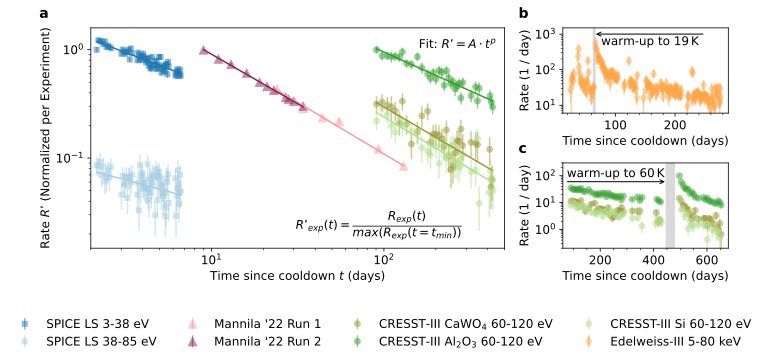

In [20]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def power_law(x, A, p):
    return A * x ** p

datasets = [
    (data['tesseract38']['time'], data['tesseract38']['rate'], data['tesseract38']['uncertainty'],'SPICE LS 3-38 eV', colors[1],'s',6),
    (data['tesseract85']['time'], data['tesseract85']['rate'], data['tesseract85']['uncertainty'],'SPICE LS 38-85 eV', colors[0],'s',6),
    (data['mannila']['time'], data['mannila']['rate'], data['mannila']['uncertainty'],'Mannila \'22 Run 1', colors[5],'^',10),
    (data['mannila2']['time'], data['mannila2']['rate'], data['mannila2']['uncertainty'], 'Mannila \'22 Run 2', colors[6],'^',10), 
    (data['cresst_CaWO4']['time'][:len(data['cresst_CaWO4']['time'])], 
     data['cresst_CaWO4']['rate'][:len(data['cresst_CaWO4']['time'])],
     data['cresst_CaWO4']['uncertainty'][:len(data['cresst_CaWO4']['time'])],r'CRESST-III CaWO$_4$ 60-120 eV', colors[7],'o',7), 
    (data['cresst_Sapp2']['time'][:len(data['cresst_Sapp2']['time'])], 
     data['cresst_Sapp2']['rate'][:len(data['cresst_Sapp2']['time'])],
     data['cresst_Sapp2']['uncertainty'][:len(data['cresst_Sapp2']['time'])],r'CRESST-III Al$_2$O$_3$ 60-120 eV', colors[4],'o',7),
    (data['cresst_Si']['time'][:len(data['cresst_Si']['time'])], 
     data['cresst_Si']['rate'][:len(data['cresst_Si']['time'])],
     data['cresst_Si']['uncertainty'][:len(data['cresst_Si']['time'])], 'CRESST-III Si 60-120 eV', colors[3],'o',7),
]


results = []


fig = plt.figure(figsize=(10, 4)) 
gs = fig.add_gridspec(2, 2, width_ratios=[2.5, 1], height_ratios=[1, 1]) 


ax = fig.add_subplot(gs[:, 0]) 

norm = [data['tesseract38']['rate'][0],
        data['tesseract38']['rate'][0],
        data['mannila2']['rate'][0],
        data['mannila2']['rate'][0],
        data['cresst_Sapp2']['rate'][0],
        data['cresst_Sapp2']['rate'][0],
        data['cresst_Sapp2']['rate'][0]
       ]

for i, (x_data, y_data, y_uncertainty,label,c,m,s) in enumerate(datasets):
    # Normalize y_data to its first value
    y_data_normalized = y_data / norm[i]
    y_uncertainty_normalized = y_uncertainty / norm[i]  # Normalize uncertainties accordingly

    if 'CRESST' in label:  # Only fit CRESST datasets for x < 430
        mask = x_data < 430
        x_data_fit = x_data[mask]
        y_data_fit = y_data_normalized[mask]
        y_uncertainty_fit = y_uncertainty_normalized[mask]
    else:  # Fit other datasets with all available x points
        x_data_fit = x_data
        y_data_fit = y_data_normalized
        y_uncertainty_fit = y_uncertainty_normalized
    
     # Initial parameter estimates
    A_initial = 100 
    p_initial = -4  
    bounds = ([-0.1, -9],[1e15, 0.1])  

   
    popt, pcov = curve_fit(power_law, x_data_fit, y_data_fit, 
                               sigma=y_uncertainty_fit, 
                               absolute_sigma=True, 
                               p0=[A_initial, p_initial],  
                               bounds=bounds) 


    A, p = popt
    A_uncertainty, p_uncertainty = np.sqrt(np.diag(pcov))


    y_fit = power_law(x_data_fit, A, p)

    chi2 = np.sum(((y_data_fit - y_fit) ** 2) / (y_uncertainty_fit ** 2))
    ndf = len(y_data_fit) - len(popt) 
    chi2_ndf = chi2 / ndf if ndf > 0 else np.nan 


    x_fit = np.linspace(min(x_data_fit), max(x_data_fit), 100)
    y_fit = power_law(x_fit, A, p)

    # Plotting original data with error bars and the fitted curve
    ax.errorbar(x_data_fit, y_data_fit, yerr=y_uncertainty_fit, fmt=m, alpha=0.5, markeredgewidth=0, color=c, label=label, zorder=1,ms=s)
    ax.plot(x_fit, y_fit,color=c,zorder=2)
    
    # Add results to the list
    results.append((label, f"{A:.2e} ± {A_uncertainty:.2e}", f"{p:.2f} ± {p_uncertainty:.2f}", f"{chi2_ndf:.2f}"))


    
    
print(f"{'Label':<30} {'A':<25} {'p':<15} {'χ²/ndf':<10}")
print("-" * 85) 
for row in results:
    print(f"{row[0]:<30} {row[1]:<25} {row[2]:<15} {row[3]:<10}")
    

fit_text = r'Fit: $R’ = A\cdot t^p$'  
ax.text(0.98, 0.95, fit_text, transform=ax.transAxes,  
        fontsize=12, verticalalignment='top', horizontalalignment='right')



fit_text = r'$R’_{exp}(t) = \dfrac{R_{exp}(t)}{max(R_{exp}(t=t_{min}))}$'
ax.text(0.9, 0.17, fit_text, transform=ax.transAxes, 
        fontsize=12, verticalalignment='top', horizontalalignment='right')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(2, 500)


ax.set_ylabel(r"Rate $R’$ (Normalized per Experiment)")
ax.set_xlabel(r'Time since cooldown $t$ (days)')



# Edelweiss (Top-right subplot) without fitting
ax2 = fig.add_subplot(gs[0, 1])  # Top-right subplot
ax2.errorbar(data['Edelweiss']['time'], data['Edelweiss']['rate'], yerr=[data['Edelweiss']['uncertainty'],data['Edelweiss']['uncertainty2']], fmt='d',
             ms=8,alpha=0.5,markeredgewidth=0,color=colors[2], label='Edelweiss-III 5-80 keV')


ax2.axvspan(62, 67, color='gray', alpha=0.3, lw=0)

arr = mpatches.FancyArrowPatch((64, 1000), (250, 1000),
                               arrowstyle='<-', mutation_scale=10)
ax2.add_patch(arr)
ax2.annotate(r'warm-up to $19\,$K', (.5, 0.), xycoords=arr, ha='center', va='top', fontsize=12)

ax2.set_xlabel('Time since cooldown (days)')
ax2.set_ylabel('Rate (1 / day)')
ax2.set_yscale('log')
ax2.set_ylim(6,1.5e3)
ax2.minorticks_on()


ax3 = fig.add_subplot(gs[1, 1])  # Bottom-right subplot
for i, (x_data, y_data, y_uncertainty,label,c,m,s) in enumerate(datasets):
    
    
# CRESST (Bottom-right subplot) without fitting
    if 'CRESST' in label: 
        ax3.errorbar(x_data, y_data, yerr=y_uncertainty, fmt=m,ms=s, alpha=0.5, markeredgewidth=0,
                     color=c)#, label=label)
ax3.axvspan(445, 480, color='gray', alpha=0.3, lw=0)

arr = mpatches.FancyArrowPatch((70, 60), (450, 60),
                               arrowstyle='->', mutation_scale=10)
ax3.add_patch(arr)
ax3.annotate(r'warm-up to $60\,$K', (.5, 1), xycoords=arr, ha='center', va='bottom', fontsize=12)

ax3.set_xlabel('Time since cooldown (days)')
ax3.set_ylabel('Rate (1 / day)')
ax3.set_yscale('log')
ax3.set_ylim(0.2,3e2)
ax3.set_xlim(60,680)
ax3.minorticks_on()

# Create a common legend for all subplots
fig.legend(loc='upper center', frameon=False, bbox_to_anchor=(0.5, -0.02), ncol=4)


fig.text(0.023, 0.99, 'a', size=14, weight='bold')
fig.text(0.69, 0.99, 'b', size=14, weight='bold')
fig.text(0.69, 0.52, 'c', size=14, weight='bold')

plt.tight_layout()
plt.savefig('plots/fig4.pdf',bbox_inches='tight',dpi=600)
plt.show()
